In [32]:
pip install opencv-python

   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
    --------------------------------------- 0.5/39.0 MB 1.3 MB/s eta 0:00:30
    --------------------------------------- 0.5/39.0 MB 1.3 MB/s eta 0:00:30
   - -------------------------------------- 1.0/39.0 MB 1.3 MB/s eta 0:00:29
   - -------------------------------------- 1.3/39.0 MB 1.4 MB/s eta 0:00:28
   - -------------------------------------- 1.6/39.0 MB 1.5 MB/s eta 0:00:26
   -- ------------------------------------- 2.1/39.0 MB 1.5 MB/s eta 0:00:25
   -- ------------------------------------- 2.9/39.0 MB 1.8 MB/s eta 0:00:21
   --- ------------------------------------ 3.4/39.0 MB 1.9 MB/s eta 0:00:19
   --- ------------------------------------ 3.4/39.0 MB 1.9 MB/s eta 0:00:19
   ---- ----------------------------------- 4.2/39.0 MB 1.9 MB/s eta 0:00:19
   ---- ----------------------------------- 4.7/39.0 MB 2.0 MB/s eta 0:00:18
   ----- ----

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.2.6 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.6 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.


In [38]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [39]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.' , untar=True) #untar means extract here or unzip


In [40]:
data_dir

'.\\datasets\\flower_photos'

In [41]:
import pathlib
# data_dir is a path to the cache directory, so append 'flower_photos'
data_dir = pathlib.Path(data_dir) / 'flower_photos'
print('Resolved data_dir:', data_dir)

jpg_files = list(data_dir.glob('*/*.jpg'))
print('Found jpg files:', jpg_files)

image_count = len(jpg_files)
print('Image count:', image_count)
image_count

Resolved data_dir: datasets\flower_photos\flower_photos
Found jpg files: [WindowsPath('datasets/flower_photos/flower_photos/daisy/100080576_f52e8ee070_n.jpg'), WindowsPath('datasets/flower_photos/flower_photos/daisy/10140303196_b88d3d6cec.jpg'), WindowsPath('datasets/flower_photos/flower_photos/daisy/10172379554_b296050f82_n.jpg'), WindowsPath('datasets/flower_photos/flower_photos/daisy/10172567486_2748826a8b.jpg'), WindowsPath('datasets/flower_photos/flower_photos/daisy/10172636503_21bededa75_n.jpg'), WindowsPath('datasets/flower_photos/flower_photos/daisy/102841525_bd6628ae3c.jpg'), WindowsPath('datasets/flower_photos/flower_photos/daisy/1031799732_e7f4008c03.jpg'), WindowsPath('datasets/flower_photos/flower_photos/daisy/10391248763_1d16681106_n.jpg'), WindowsPath('datasets/flower_photos/flower_photos/daisy/10437754174_22ec990b77_m.jpg'), WindowsPath('datasets/flower_photos/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'), WindowsPath('datasets/flower_photos/flower_photos/daisy/104

3670

In [42]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

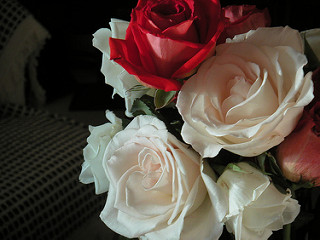

In [43]:
PIL.Image.open(str(roses[1])) # Open the image file

In [44]:
flowers_image_dict = {
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'roses': list(data_dir.glob('roses/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}
flowers_image_dict

{'daisy': [WindowsPath('datasets/flower_photos/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
  WindowsPath('datasets/flower_photos/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
  WindowsPath('datasets/flower_photos/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
  WindowsPath('datasets/flower_photos/flower_photos/daisy/10172567486_2748826a8b.jpg'),
  WindowsPath('datasets/flower_photos/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
  WindowsPath('datasets/flower_photos/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
  WindowsPath('datasets/flower_photos/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
  WindowsPath('datasets/flower_photos/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
  WindowsPath('datasets/flower_photos/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
  WindowsPath('datasets/flower_photos/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
  WindowsPath('datasets/flower_photos/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
  WindowsPath('d

In [45]:
flowers_label_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4
}

In [46]:
str(flowers_image_dict['roses'][0])

'datasets\\flower_photos\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [53]:
import cv2
img = cv2.imread(str(flowers_image_dict['roses'][0])) # Read the image using OpenCV
img.shape

(240, 179, 3)

In [ ]:
cv2.resize(img, (180, 180)).shape #resize the image to 180x180 pixels   

(180, 180, 3)

In [58]:
X , y = [], []
for flower_name, images in flowers_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (180, 180))
        X.append(resized_img)
        y.append(flowers_label_dict[flower_name])
        

In [59]:
X = np.array(X)
y = np.array(y)

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [63]:
len(X_train), len(X_test)

(2752, 918)

In [64]:
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

In [69]:
model = Sequential([
    layers.Conv2D(20, 3, padding='same', activation='relu', input_shape=(180, 180, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(30, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(50, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(), # flatten the 3D feature maps to 1D feature vectors
    layers.Dense(150, activation='relu'),
    layers.Dense(5 , activation='softmax')
])

In [70]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
model.fit(X_train_scaled, y_train, epochs=15)

Epoch 1/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 150ms/step - accuracy: 0.4215 - loss: 1.3476
Epoch 2/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 139ms/step - accuracy: 0.5905 - loss: 1.0550
Epoch 3/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 141ms/step - accuracy: 0.6733 - loss: 0.8707
Epoch 4/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 141ms/step - accuracy: 0.7373 - loss: 0.7105
Epoch 5/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 139ms/step - accuracy: 0.8216 - loss: 0.5039
Epoch 6/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 147ms/step - accuracy: 0.8812 - loss: 0.3283
Epoch 7/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 144ms/step - accuracy: 0.9313 - loss: 0.1994
Epoch 8/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 139ms/step - accuracy: 0.9608 - loss: 0.1272
Epoch 9/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 141ms/step - accuracy: 0.9797 - loss: 0.0812
Epoch 10/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 139ms/step - accuracy: 0.9891 - loss: 0.0443
Epoch 11/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 143ms/step - accuracy: 0.9866 - loss: 0.0568
Epoch 12/15
86/86 ━━━━━━━━━━━━━━━━━━━━ 12

In [72]:
model.evaluate(X_test_scaled, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.5773 - loss: 2.8304


[2.8303744792938232, 0.5773420333862305]

This is because of overfitting

DATA AUGMENTATION

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal", input_shape=(180, 180, 3)),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
        
    ]
)

f:\Anaconda\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [77]:
model = Sequential([
    data_augmentation,#With data augmentation
    layers.Conv2D(20, 3, padding='same', activation='relu', input_shape=(180, 180, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(30, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(50, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),#Dropout layer to reduce overfitting

    layers.Flatten(), # flatten the 3D feature maps to 1D feature vectors
    layers.Dense(150, activation='relu'),
    layers.Dense(5 , activation='softmax')
])

f:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [78]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])


In [79]:
model.fit(X_train_scaled, y_train, epochs=10)


Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 179ms/step - accuracy: 0.3863 - loss: 1.4384
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 161ms/step - accuracy: 0.5520 - loss: 1.1095
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 163ms/step - accuracy: 0.6174 - loss: 1.0014
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 174ms/step - accuracy: 0.6370 - loss: 0.9224
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 166ms/step - accuracy: 0.6722 - loss: 0.8571
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 175ms/step - accuracy: 0.6795 - loss: 0.8335
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 187ms/step - accuracy: 0.7122 - loss: 0.7702
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 204ms/step - accuracy: 0.7115 - loss: 0.7622
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 173ms/step - accuracy: 0.7133 - loss: 0.7156
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 198ms/step - accuracy: 0.7318 - loss: 0.7035


In [80]:
model.evaluate(X_test_scaled, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.6983 - loss: 0.7456


[0.7456415891647339, 0.6982570886611938]

There is no overfitting here and accuracy on test data is improved